# Exploratory Data Analysis - After Cleansing

# DataSet

In [3]:
import pandas as pd
import seaborn as sns
import os

df = pd.read_csv(os.getcwd()+'/data/CleanData.csv')
df.head(5)

,ID,Title,Publication,Author,Published,Year,Month,Category,URL,Content,Label
0,55990,WhatsNewsBusinessFinance,WSJ,Journalist,01/02/18,2018,1,Whats News Business Finance,https://www.wsj.com/articles/whats-news-busine...,The unemployment rate in some metro areas stan...,Real
1,27156,ABrowserYouveNeverHeardofIsDethroningGoogleinAsia,WSJ,"NewleyPurnell,NewleyPurnellWsjCom",01/01/18,2018,1,Tech,https://www.wsj.com/articles/a-browser-youve-n...,JAKARTA IndonesiaA mobile browser rarely used ...,Real
2,20024,MarkedSafestYearinCommercialAviationHistory,WSJ,"AndyPasztor,AndyPasztorWsjCom",01/02/18,2018,1,U.S.,https://www.wsj.com/articles/2017-marked-safes...,The global airline industry achieved a previou...,Real
3,69423,FiveThingstoKnowAbouttheIranianProtests,WSJ,"FarnazFassihi,FarnazFassihiWsjCom",12/31/17,2017,12,World,https://www.wsj.com/articles/economics-dissati...,Protests erupted across Iran for a third day o...,Real
4,93155,PhotosoftheDayJan,WSJ,Journalist,01/01/18,2018,1,None,https://www.wsj.com/articles/photos-of-the-day...,Photos of the Day Jan Children warm up by a fi...,Real


In [9]:
list(df)

['ID',
 'Title',
 'Publication',
 'Author',
 'Published',
 'Year',
 'Month',
 'Category',
 'URL',
 'Content',
 'Label']

# Null Values

In [10]:
df = pd.read_csv('CleanData.csv')
df
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

# Real Vs Fake

83527 24306


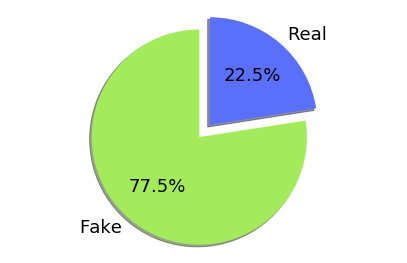

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

blue = '#5A6FFA'
green = '#A3EB5B'

Fake, Real = sum(df.loc[:, 'Label'] == 'Fake'), sum(df.loc[:, 'Label'] == 'Real')
print(Fake, Real)

from matplotlib import rcParams
rcParams['font.size'] = 18

piechart = plt.pie(
    (Fake, Real),
    labels=('Fake','Real'),
    shadow=True,
    colors=(green, blue),
    explode=(0,0.15), # space between slices 
    startangle=90,    # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',# display fraction as percentages
)

plt.axis('equal')   
plt.tight_layout()

Amount of Real and Fake data in dataset

In [12]:
%reload_ext watermark

# Fake Data WordCloud

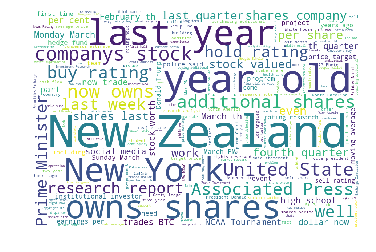

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text 
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline


fake_words = ' '.join(df.loc[df['Label']=='Fake', 'Content'])

#plotting of wordcloud
fake_wordcloud = WordCloud( 
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=900,
                      height=600
            ).generate(fake_words)

plt.imshow(fake_wordcloud)
plt.axis('off')
plt.show()

As we have collected fake data from various articles, many stock related news were hyped in the share market at NSE and also New Zealand's mosque attacks rumours were in all the newspapers, which had various assumptions related to attack.

# Real Data WordCloud 

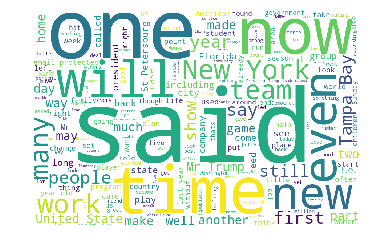

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text 
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

real_words = ' '.join(df.loc[df['Label']=='Real', 'Content'])

real_wordcloud = WordCloud( 
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=900,
                      height=600
            ).generate(real_words)

plt.imshow(real_wordcloud)
plt.axis('off')
plt.show()

The source which we selected for real data are NY Times , TampaBay and WSJ.As the content of NY times is more than other 2 newspaper articles, it has given data related to New York.

# Word Cloud for entire content file

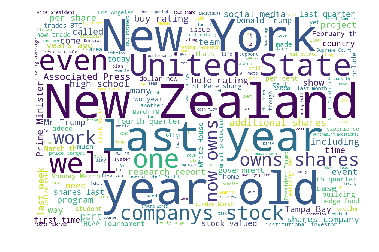

In [19]:
words = ' '.join(df.loc[:, 'Content'])

wordcloud = WordCloud( 
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=800
            ).generate(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()